In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:

image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

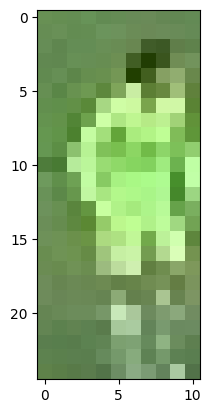

In [4]:
plt.imshow(image)
plt.show()

# take the top half of the image

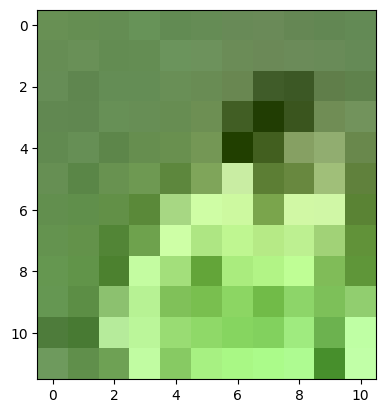

In [5]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

"""
The image is split in half by slicing: image[0:int(image.shape[0]/2), :] extracts the top half.

image.shape[0]: This gives the number of rows (height) in the image.
int(image.shape[0]/2): Calculates half of the height of the image.
image[0: int(image.shape[0]/2), :]:
The first part 0: int(image.shape[0]/2) selects the first half of the rows, i.e., the top half of the image.
The second part : means all columns are selected, so you keep the entire width of the image.
The third part : (which is implicit) selects all three color channels (R, G, B).

The top half is displayed using plt.imshow.
"""

# cluster the image into two Parts

c:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1
 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0]
(132,)
(12, 11)


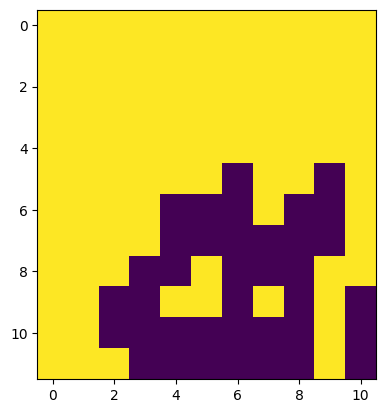

In [18]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
"""
The algorithm attempts to partition pixels into two groups by minimizing 
the distance between each pixel and the centroid of its cluster in the RGB color space.
Underlying logic: Each pixel is treated as a point in 3D space (with dimensions corresponding to the RGB values). 
K-means tries to divide these points into two groups by iteratively adjusting cluster centers.
"""
kmeans.fit(image_2d)
# get the cluster labels
labels = kmeans.labels_
print(labels)
print(labels.shape) 
# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])
print(clustered_image.shape)
"""    
kmeans.labels_ contains the cluster label for each pixel.
The labels are reshaped back to the original shape of the top half of the image. 
Now each pixel is represented by its corresponding cluster (either 0 or 1).
The segmented (clustered) image is visualized using plt.imshow. 
It displays the regions assigned to each cluster, essentially simplifying the image to two colors representing the two clusters.
"""
# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [19]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]



"""
Logic: The pixels in the four corners of the image are assumed to be part of the background (non-player). 
The code gathers the cluster labels for the four corner pixels.
Determining the most common cluster in the corners: The max(set(corner_clusters), key=corner_clusters.count) identifies the most frequent label in the corner pixels, 
assuming it represents the "non-player" region.

clustered_image[0, 0]: This selects the pixel in the top-left corner of the image.
clustered_image[0, -1]: This selects the pixel in the top-right corner. The -1 index refers to the last column in the first row.
clustered_image[-1, 0]: This selects the pixel in the bottom-left corner. The -1 index refers to the last row.
clustered_image[-1, -1]: This selects the pixel in the bottom-right corner. Both indices are -1, so it’s the last pixel in the last row and column.

Each of these values will be either 0 or 1, depending on the cluster they belong to (since the image has been clustered into 2 groups).

"""

non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

"""
set(corner_clusters): This creates a set of unique values from corner_clusters. For example, if the corners have values [0, 0, 1, 0], the set would be {0, 1}.
corner_clusters.count: This counts how many times a particular value appears in the corner_clusters list. 
For instance, if the list is [0, 0, 1, 0], then corner_clusters.count(0) would return 3, and corner_clusters.count(1) would return 1.
max(..., key=corner_clusters.count): This returns the value (either 0 or 1) that occurs the most frequently in the corner_clusters list. 
In the example of [0, 0, 1, 0], the value 0 occurs three times, so max will return 0.
Thus, non_player_cluster will be assigned the most common cluster label among the corner pixels, which is likely to represent the background (non-player) region.
"""
print(non_player_cluster)

1


In [9]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


# K-MEANS CLUSTERING 


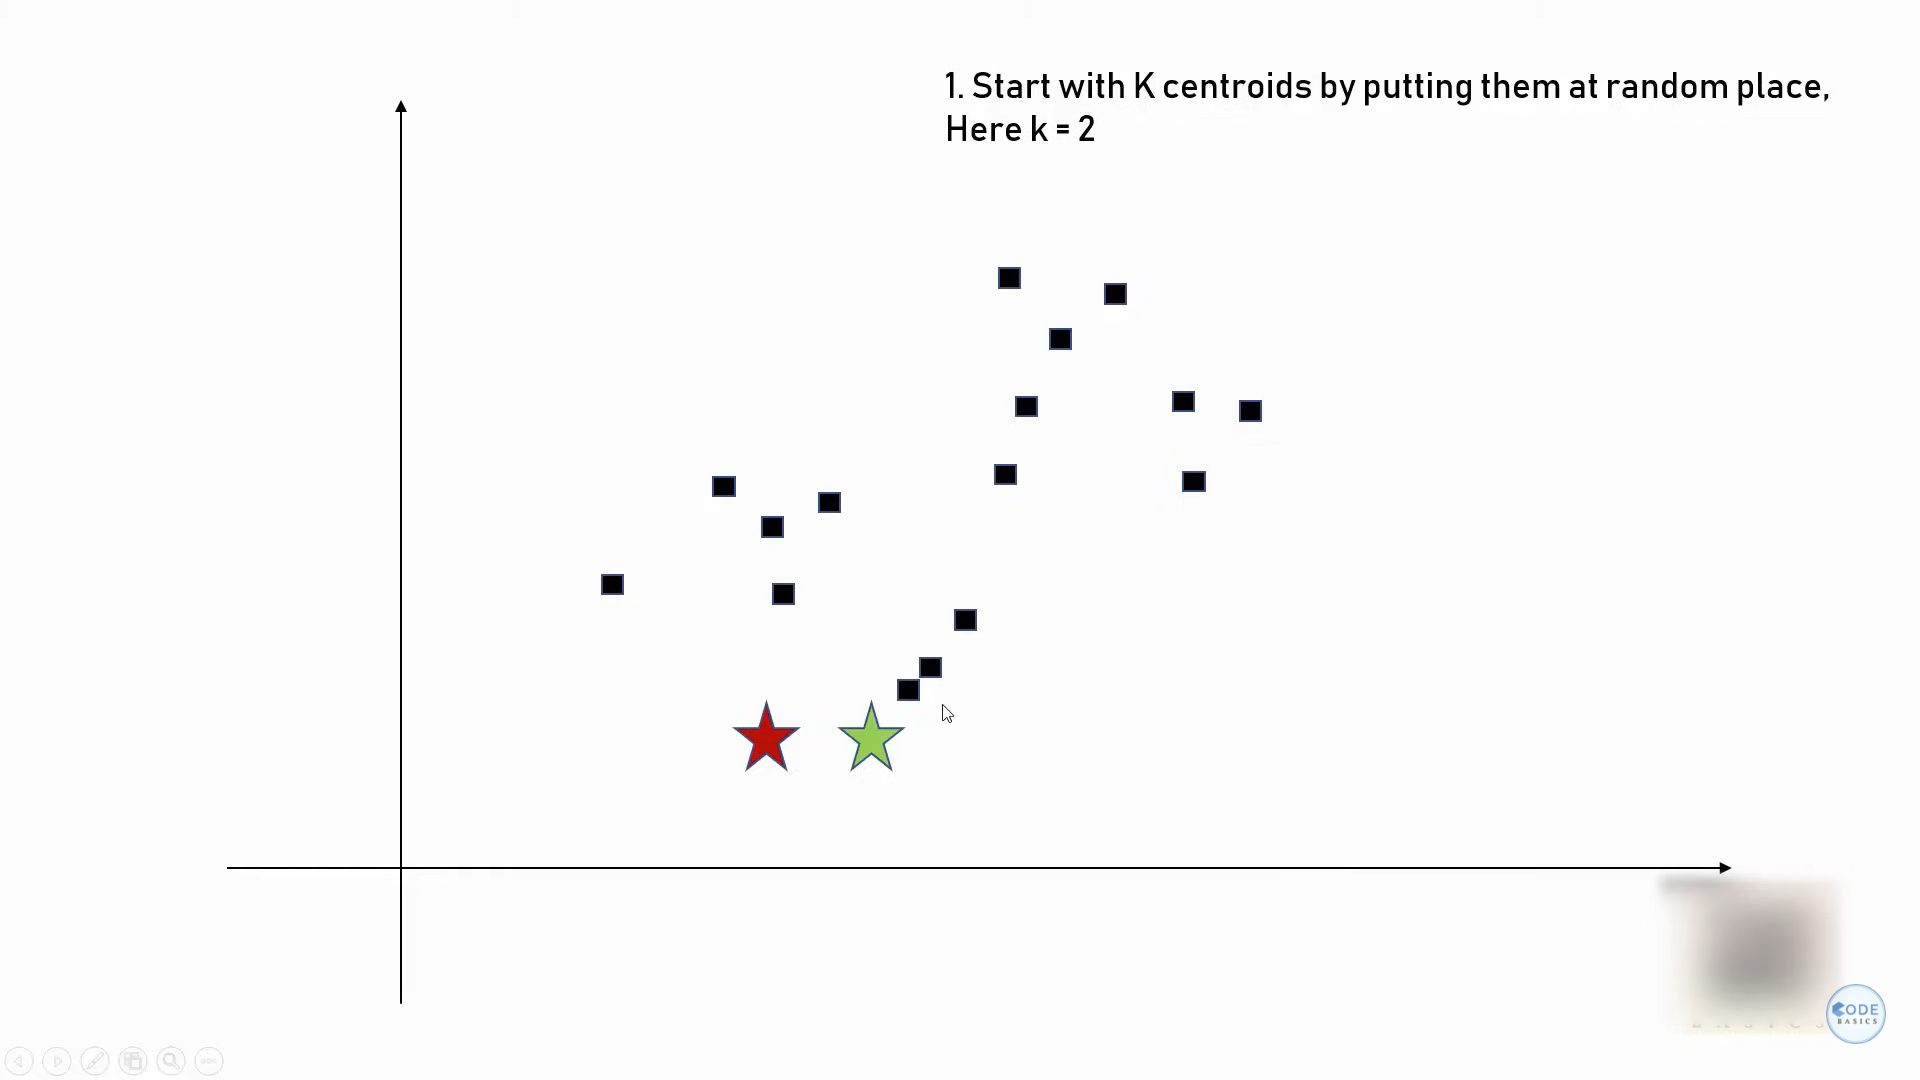
<!-- 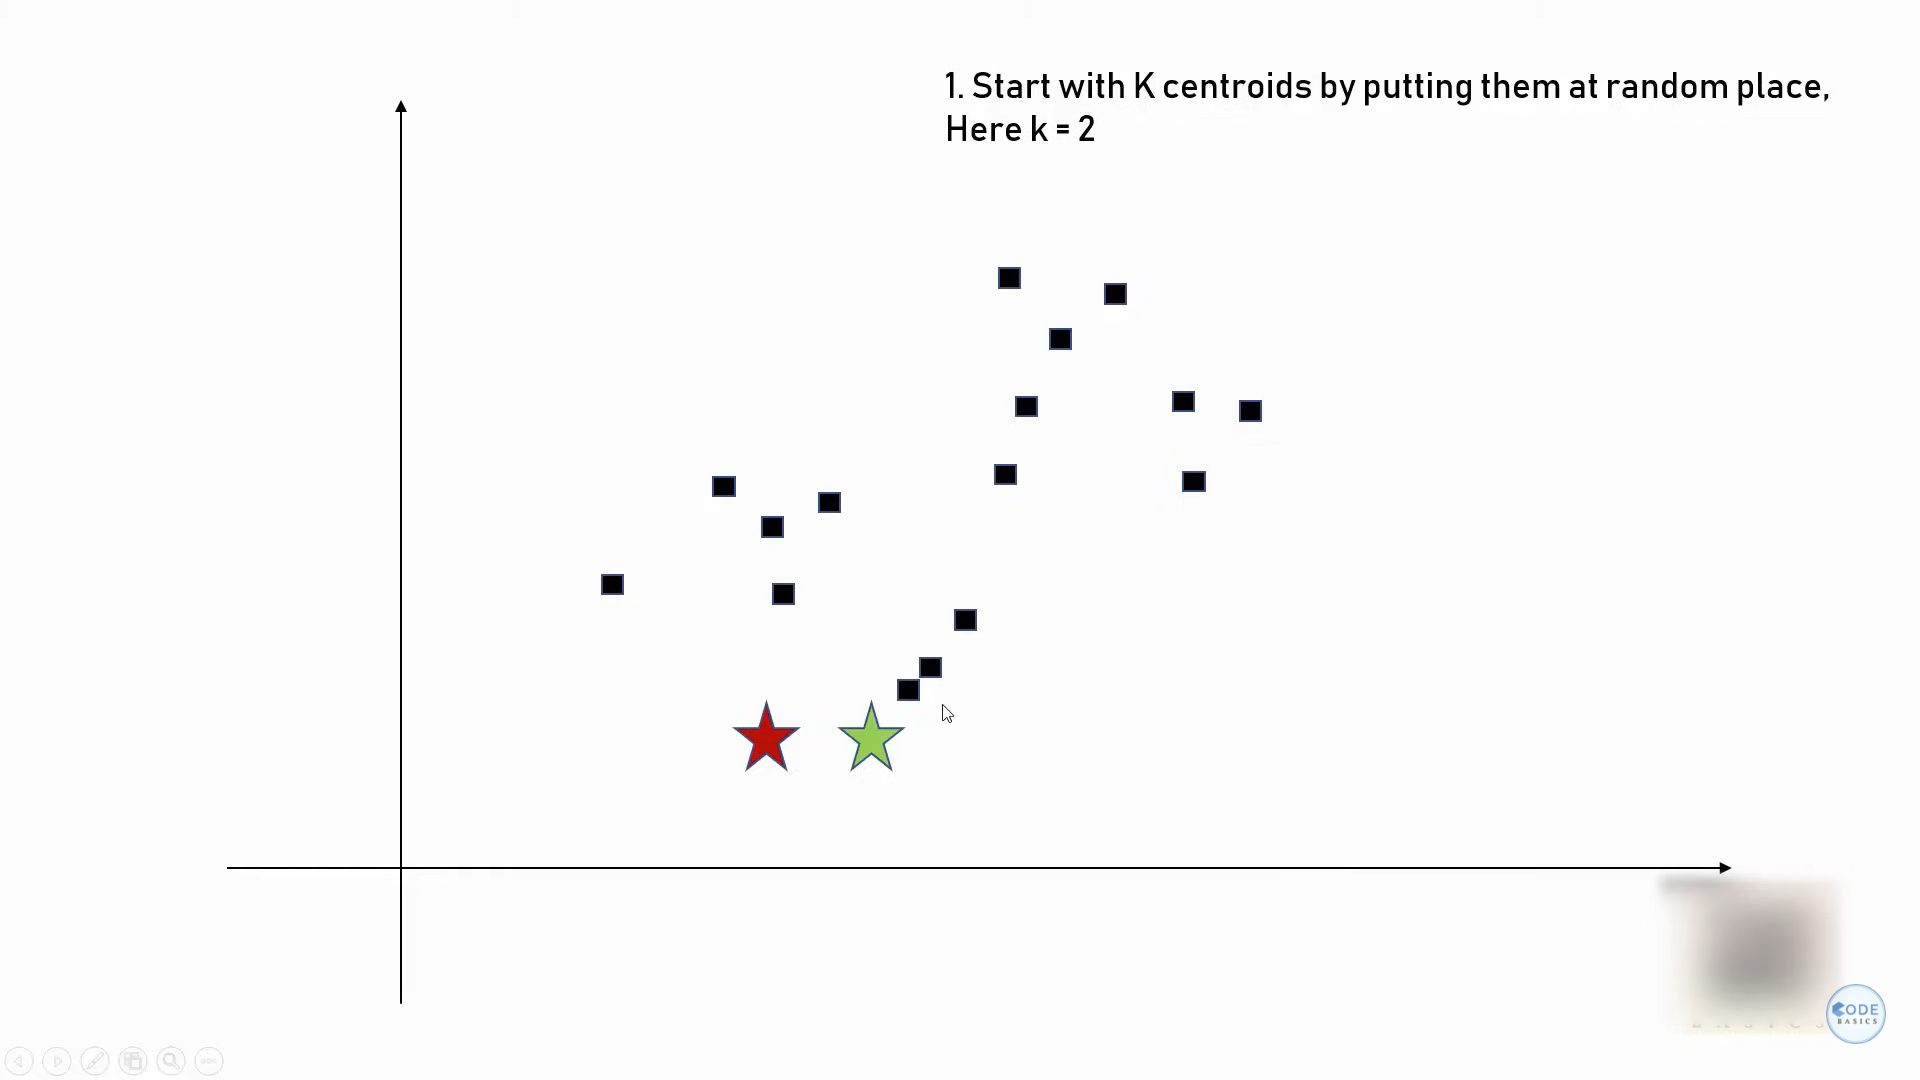 -->

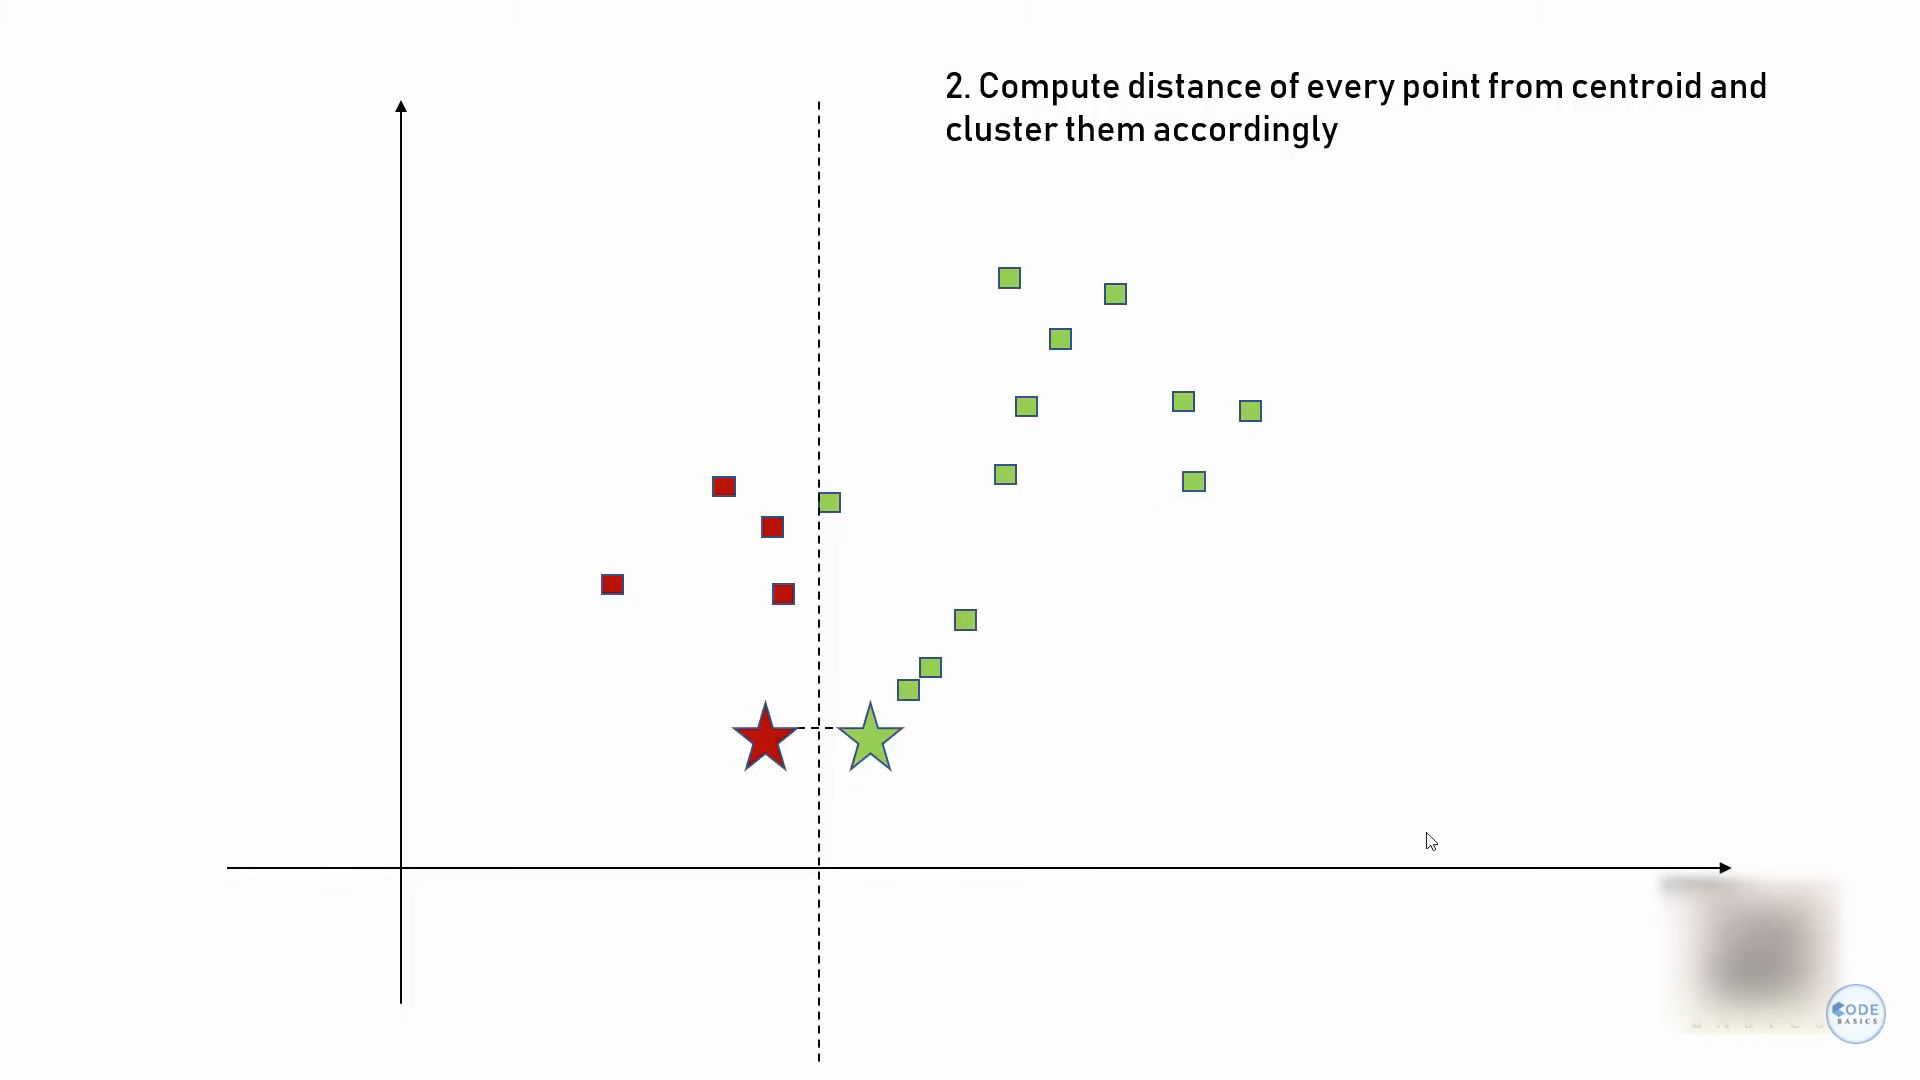

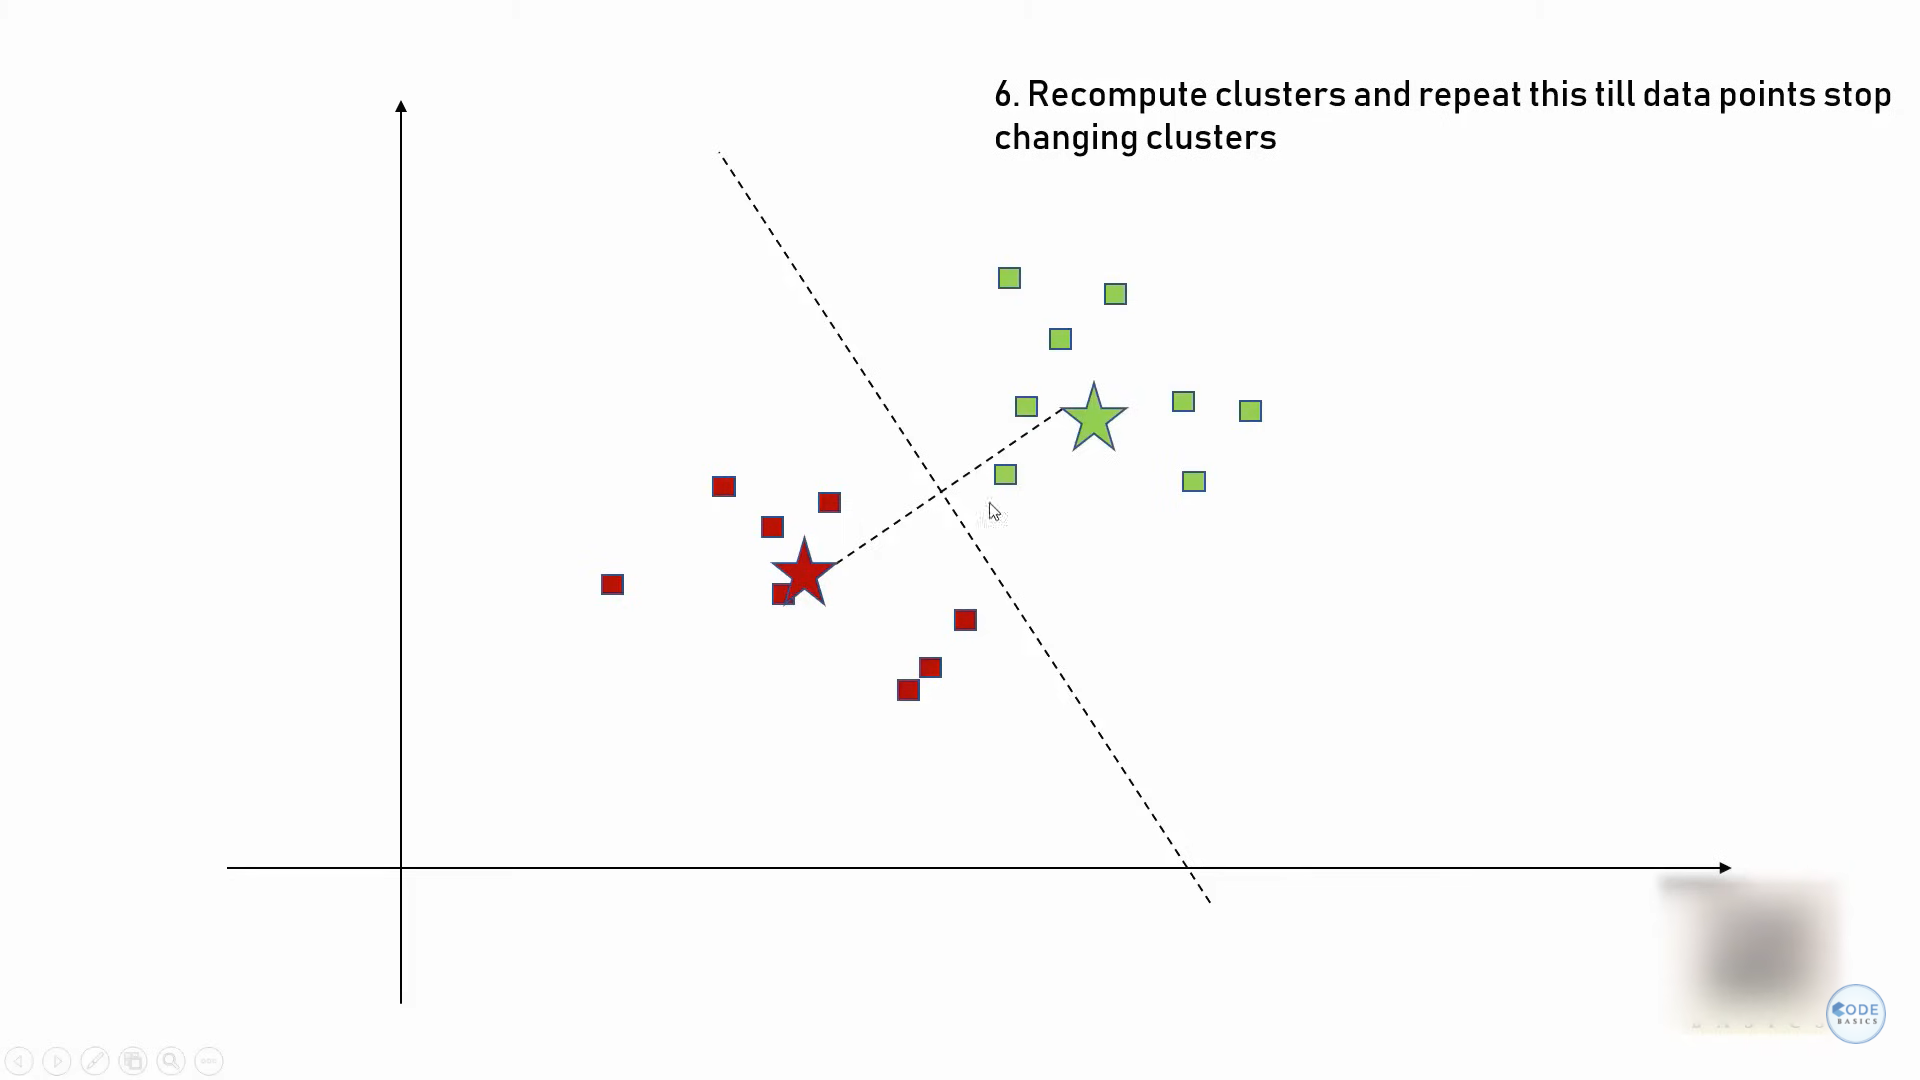

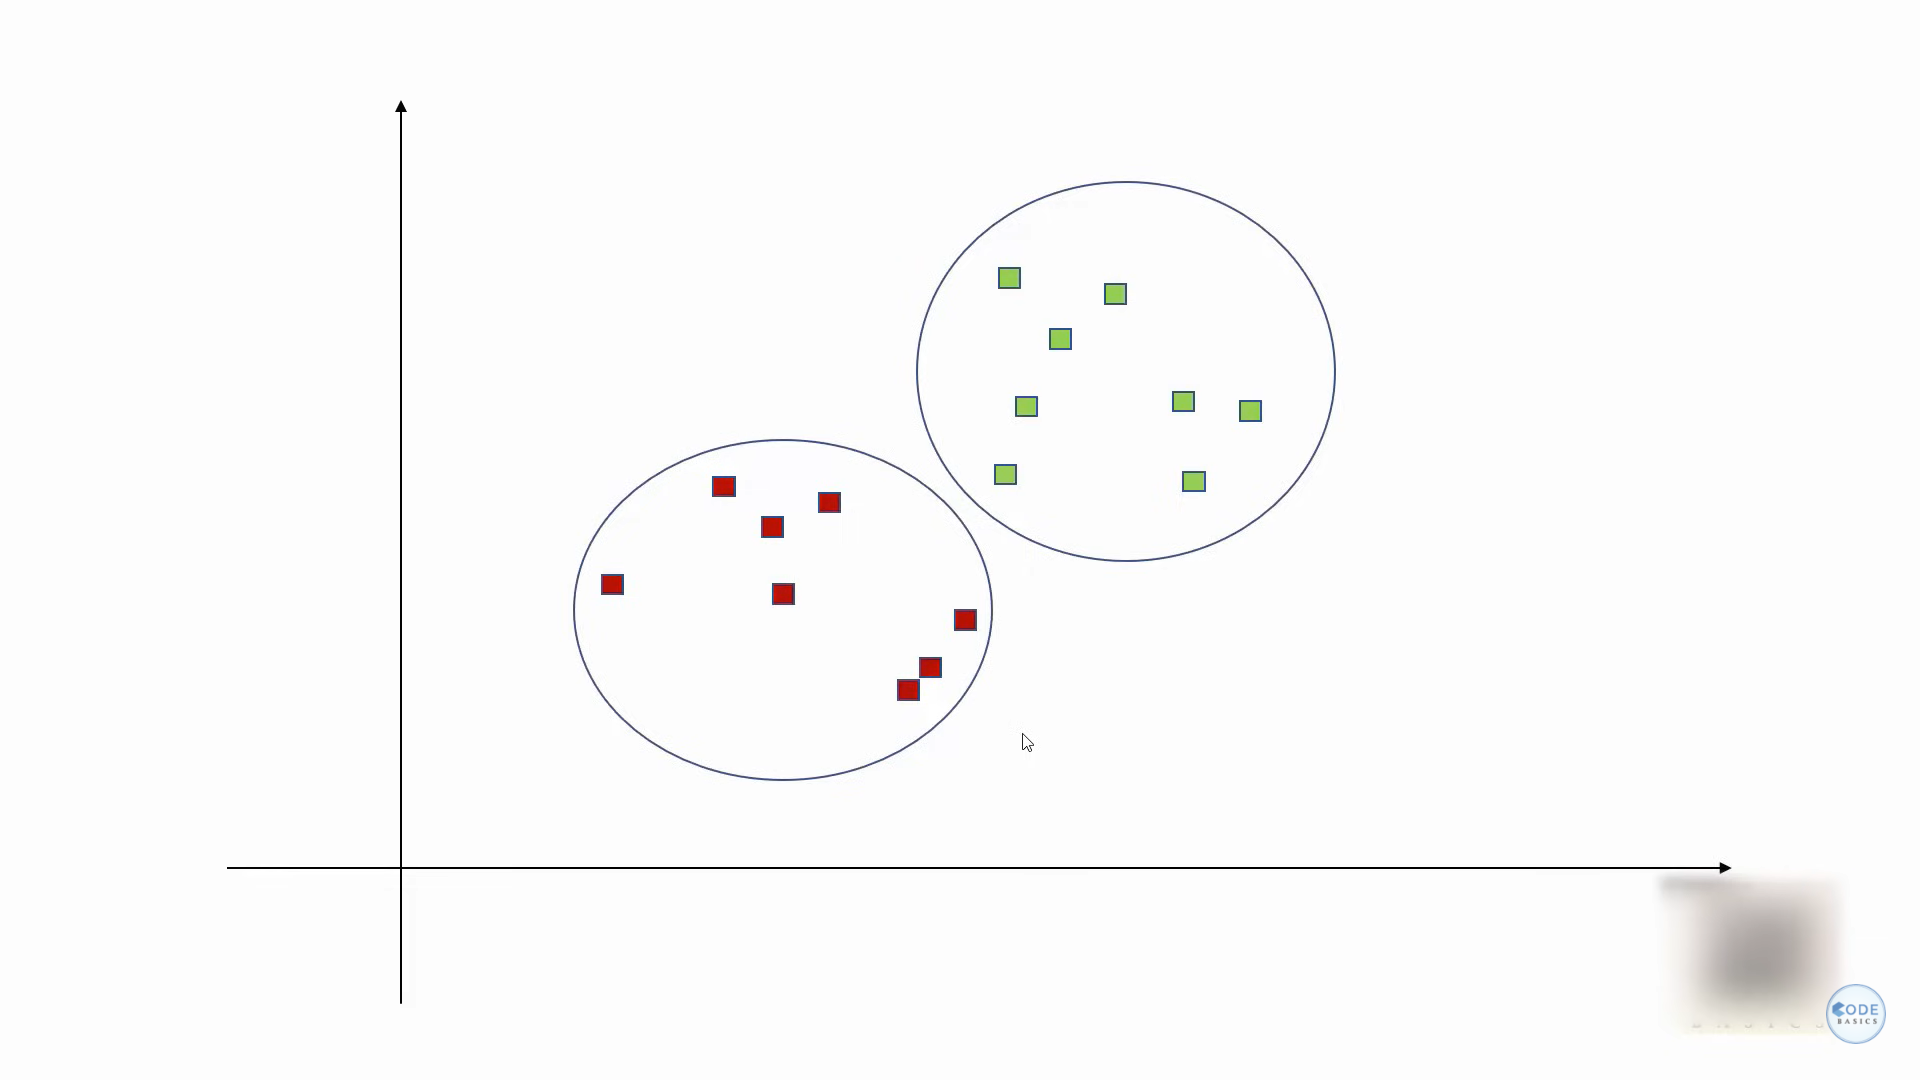

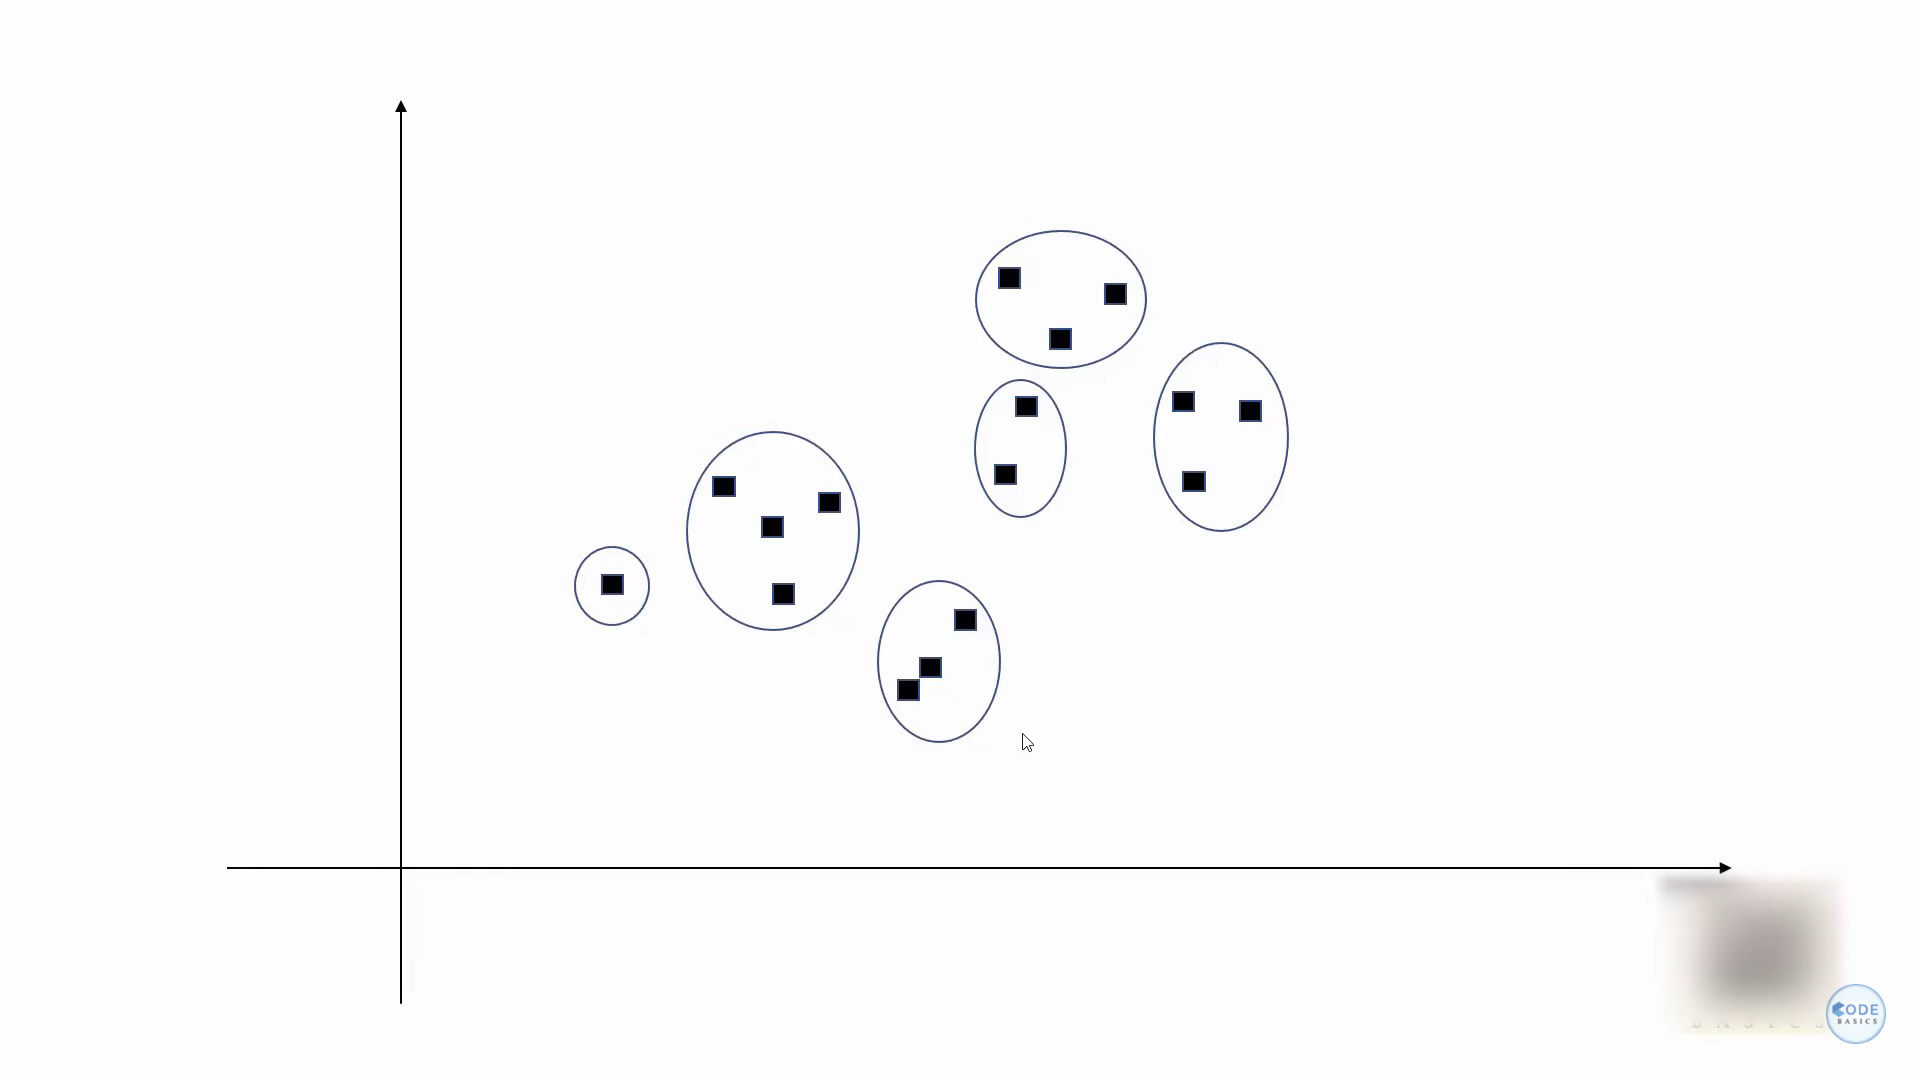

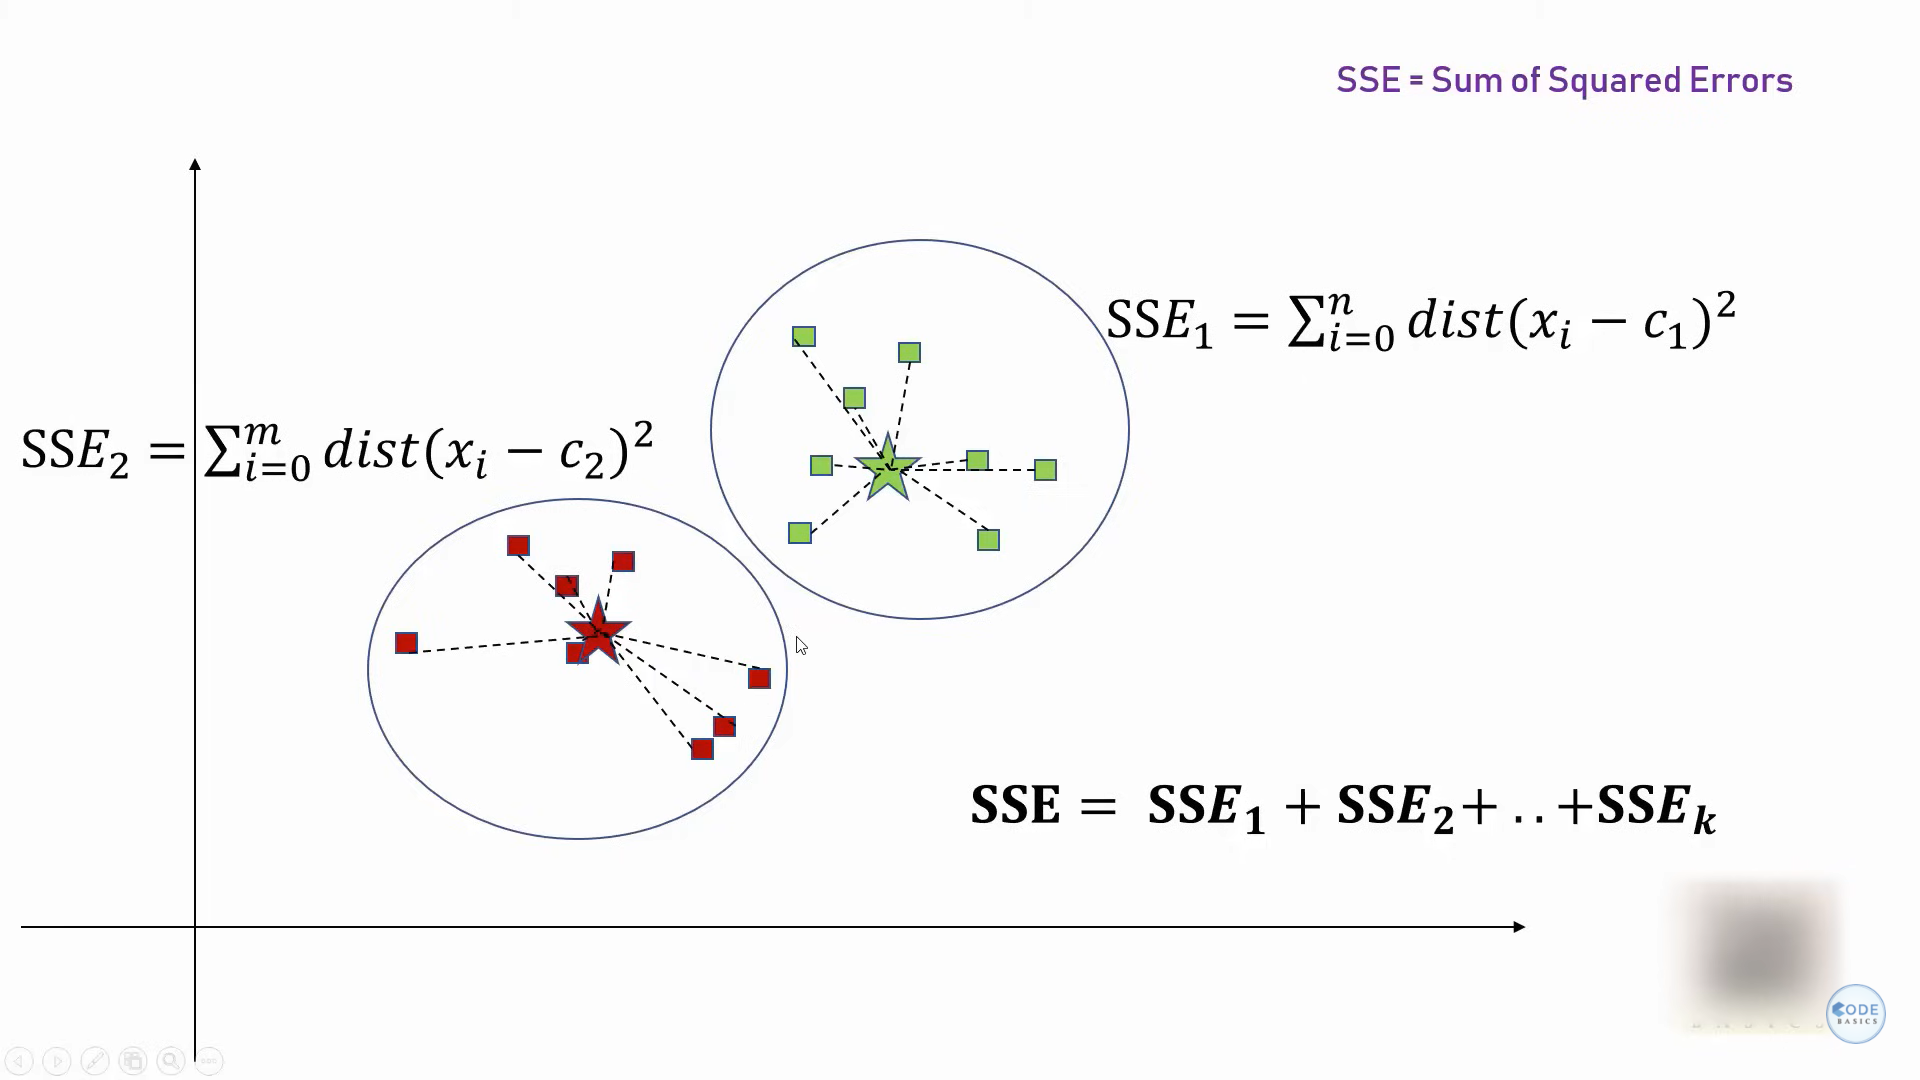

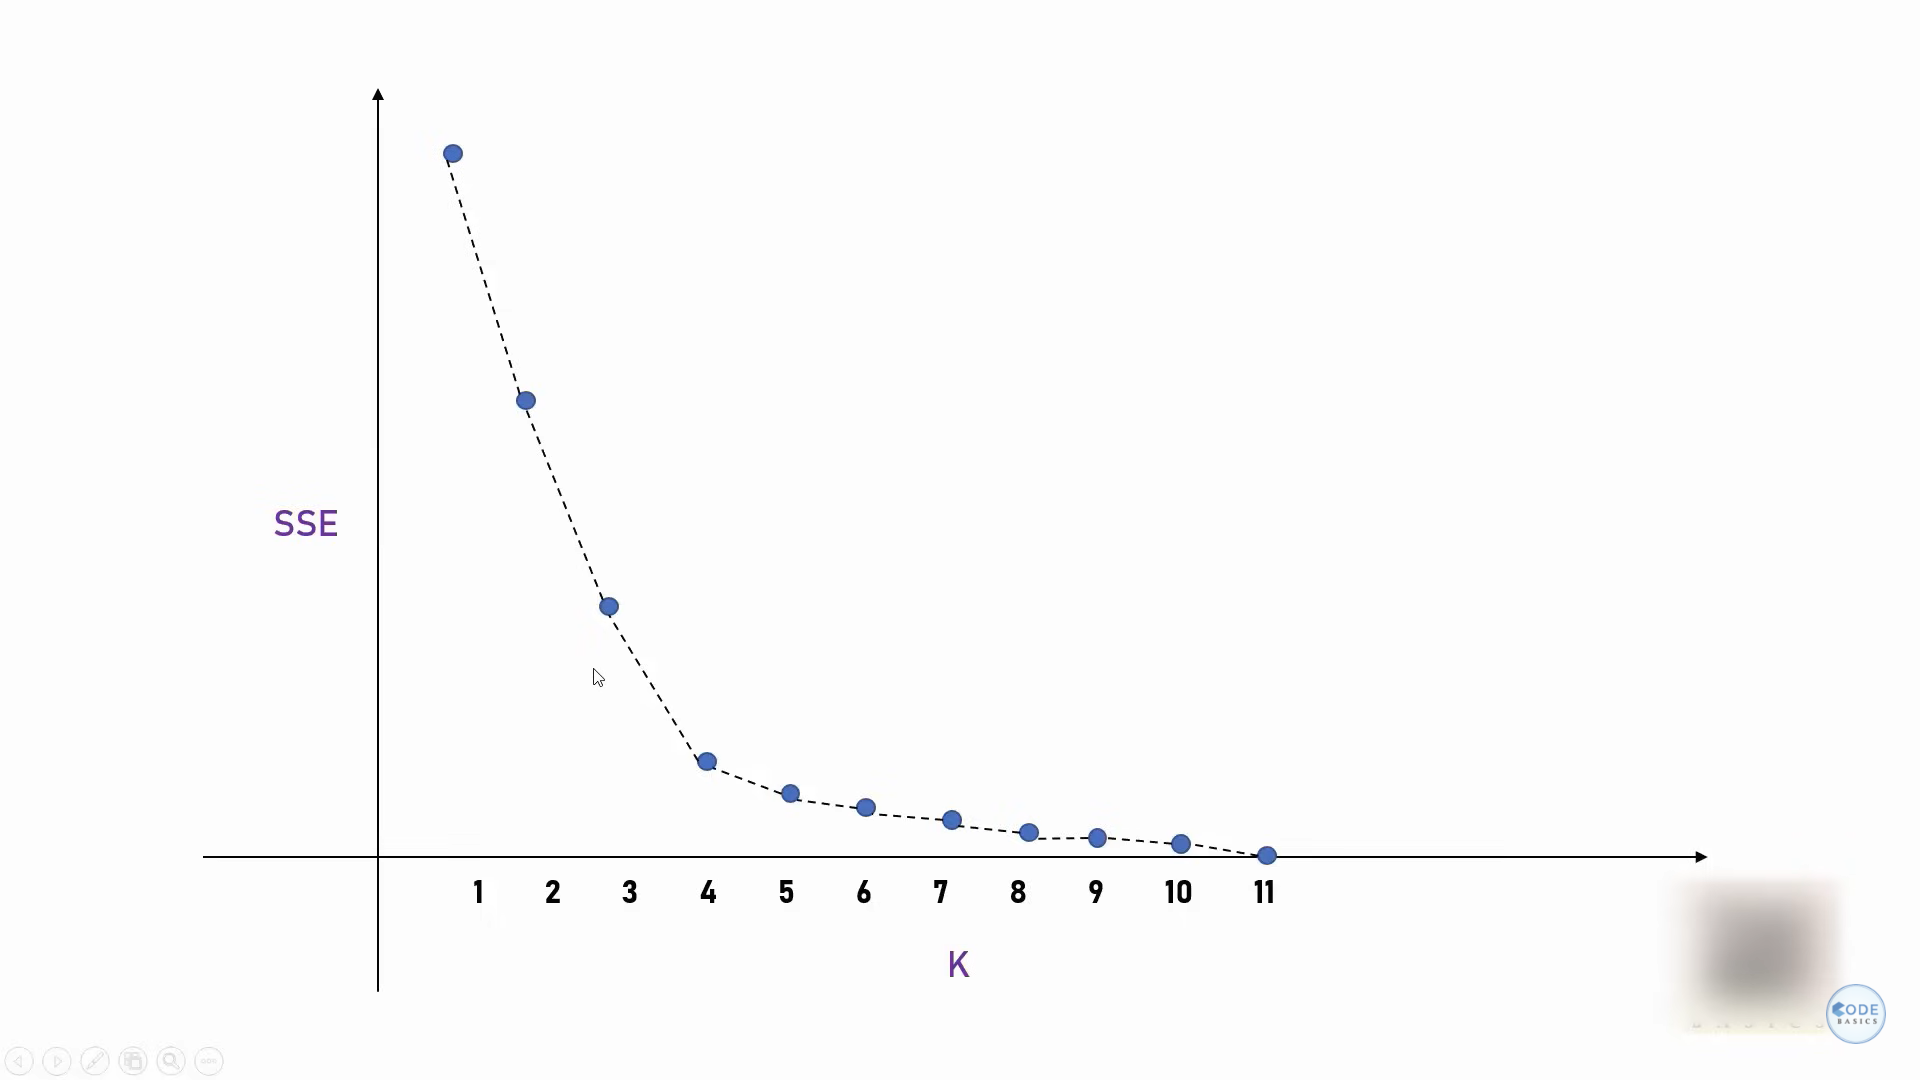